# 📊 Marketing Data Analysis: Synthetic Data Investigation

## Objective
This notebook investigates the **synthetic nature** of the marketing campaign dataset and demonstrates how this leads to:
- **Weak correlations** between features and target variables
- **Poor model performance** in predictive modeling
- **Uniform distributions** that lack real-world patterns

## Analysis Overview
We'll analyze the relationship between categorical features and key performance metrics:
- **Conversion Rate**
- **Acquisition Cost** 
- **Clicks**
- **Impressions**
- **Engagement Score**

Across these categorical dimensions:
- **Target Audience**
- **Campaign Type**
- **Channel Used**
- **Location**
- **Language**
- **Customer Segment**


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set figure parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📊 Libraries loaded successfully!")
print("🔍 Ready to investigate synthetic data patterns...")


📊 Libraries loaded successfully!
🔍 Ready to investigate synthetic data patterns...


In [7]:
# Load the raw marketing campaign dataset
df = pd.read_csv('data/marketing_campaign_dataset.csv')

print(f"📈 Dataset loaded: {df.shape[0]:,} campaigns with {df.shape[1]} features")
print(f"📅 Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"🏢 Unique companies: {df['Company'].nunique()}")

# Display basic information
print("\n📋 Dataset Overview:")
print(df.info())

print("\n🔍 First 5 rows:")
df.head()


📈 Dataset loaded: 200,000 campaigns with 16 features
📅 Date range: 2021-01-01 to 2021-12-31
🏢 Unique companies: 5

📋 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [8]:
# Data preprocessing for analysis
df_analysis = df.copy()

# Convert Acquisition_Cost to numeric
df_analysis['Acquisition_Cost'] = (df_analysis['Acquisition_Cost']
                                   .str.replace(r'[$,]', '', regex=True)
                                   .astype(float))

# Extract numeric duration
df_analysis['Duration_Days'] = df_analysis['Duration'].str.extract(r'(\d+)').astype(int)

# Add date features
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])
df_analysis['Month'] = df_analysis['Date'].dt.month_name()
df_analysis['Year'] = df_analysis['Date'].dt.year

print("✅ Data preprocessing completed")
print(f"📊 Acquisition Cost range: ${df_analysis['Acquisition_Cost'].min():,.0f} - ${df_analysis['Acquisition_Cost'].max():,.0f}")
print(f"📅 Duration range: {df_analysis['Duration_Days'].min()} - {df_analysis['Duration_Days'].max()} days")

# Define our target variables and categorical features for analysis
target_variables = [
    'Conversion_Rate', 'Acquisition_Cost', 'Clicks', 
    'Impressions', 'Engagement_Score'
]

categorical_features = [
    'Target_Audience', 'Campaign_Type', 'Channel_Used',
    'Location', 'Language', 'Customer_Segment'
]

print(f"\n🎯 Target variables: {target_variables}")
print(f"📂 Categorical features: {categorical_features}")


✅ Data preprocessing completed
📊 Acquisition Cost range: $5,000 - $20,000
📅 Duration range: 15 - 60 days

🎯 Target variables: ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score']
📂 Categorical features: ['Target_Audience', 'Campaign_Type', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']


## 🔍 Part 1: Categorical Feature Distributions

Let's first examine the distribution of each categorical feature to identify synthetic patterns.


📊 CATEGORICAL FEATURE DISTRIBUTIONS
Target_Audience:
  Unique values: 5
  Distribution: {'Men 18-24': 40258, 'Men 25-34': 40023, 'All Ages': 40019, 'Women 25-34': 40013, 'Women 35-44': 39687}
  Coefficient of Variation: 0.005 (Lower = more uniform)

Campaign_Type:
  Unique values: 5
  Distribution: {'Influencer': 40169, 'Search': 40157, 'Display': 39987, 'Email': 39870, 'Social Media': 39817}
  Coefficient of Variation: 0.004 (Lower = more uniform)

Channel_Used:
  Unique values: 6
  Distribution: {'Email': 33599, 'Google Ads': 33438, 'YouTube': 33392, 'Instagram': 33392, 'Website': 33360, 'Facebook': 32819}
  Coefficient of Variation: 0.007 (Lower = more uniform)

Location:
  Unique values: 5
  Distribution: {'Miami': 40269, 'New York': 40024, 'Chicago': 40010, 'Los Angeles': 39947, 'Houston': 39750}
  Coefficient of Variation: 0.004 (Lower = more uniform)

Language:
  Unique values: 5
  Distribution: {'Mandarin': 40255, 'Spanish': 40102, 'German': 39983, 'English': 39896, 'French': 3

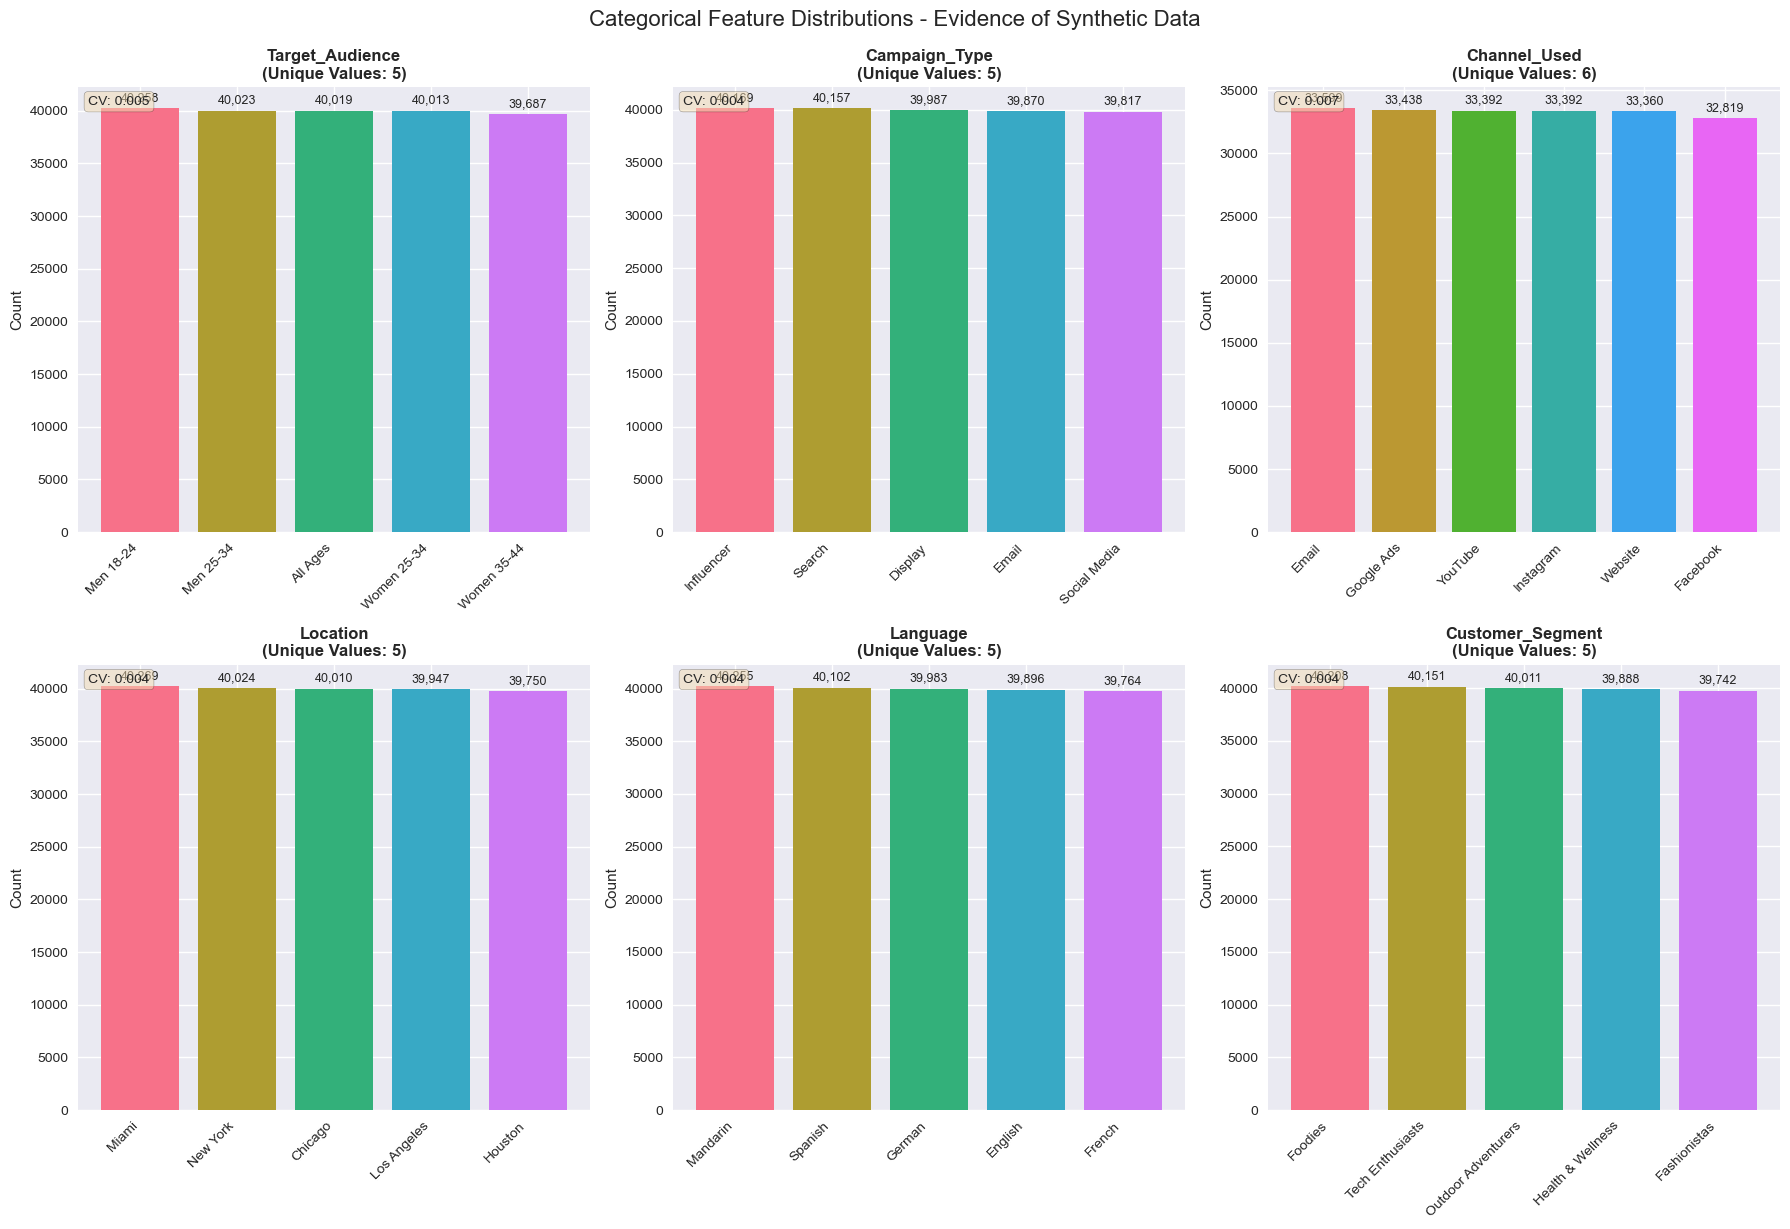

🔍 UNIFORMITY ANALYSIS:
A low Coefficient of Variation (CV < 0.1) indicates very uniform distribution,
which is typical of synthetic data rather than real-world data.


In [9]:
# Analyze categorical feature distributions
print("📊 CATEGORICAL FEATURE DISTRIBUTIONS")
print("=" * 60)

# Create subplots for all categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Count values
    value_counts = df_analysis[feature].value_counts()
    
    # Create bar plot
    ax = axes[i]
    bars = ax.bar(range(len(value_counts)), value_counts.values, color=sns.color_palette("husl", len(value_counts)))
    ax.set_title(f'{feature}\n(Unique Values: {len(value_counts)})', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.set_ylabel('Count')
    
    # Add value labels on bars
    for bar, count in zip(bars, value_counts.values):
        ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(value_counts.values)*0.01,
                f'{count:,}', ha='center', va='bottom', fontsize=9)
    
    # Calculate uniformity metric (coefficient of variation)
    cv = np.std(value_counts.values) / np.mean(value_counts.values)
    ax.text(0.02, 0.98, f'CV: {cv:.3f}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    print(f"{feature}:")
    print(f"  Unique values: {len(value_counts)}")
    print(f"  Distribution: {dict(value_counts)}")
    print(f"  Coefficient of Variation: {cv:.3f} (Lower = more uniform)")
    print()

plt.tight_layout()
plt.suptitle('Categorical Feature Distributions - Evidence of Synthetic Data', fontsize=16, y=1.02)
plt.show()

print("🔍 UNIFORMITY ANALYSIS:")
print("A low Coefficient of Variation (CV < 0.1) indicates very uniform distribution,")
print("which is typical of synthetic data rather than real-world data.")


## 📈 Part 2: Target Variable Analysis by Categories

Now let's examine how our target variables (performance metrics) vary across different categorical features.


📊 TARGET VARIABLE ANALYSIS BY CATEGORIES

🎯 ANALYZING: Conversion_Rate
--------------------------------------------------

Target_Audience:
  Coefficient of Variation: 0.0013
  F-statistic: 0.4380
  P-value: 0.7812
  Effect size (η²): 0.0000
  Statistics by category:
    All Ages: mean=0.0800, std=0.0406
    Men 18-24: mean=0.0802, std=0.0404
    Men 25-34: mean=0.0801, std=0.0406
    Women 25-34: mean=0.0799, std=0.0408
    Women 35-44: mean=0.0801, std=0.0407

Campaign_Type:
  Coefficient of Variation: 0.0020
  F-statistic: 0.8873
  P-value: 0.4705
  Effect size (η²): 0.0000
  Statistics by category:
    Display: mean=0.0801, std=0.0408
    Email: mean=0.0798, std=0.0407
    Influencer: mean=0.0803, std=0.0405
    Search: mean=0.0800, std=0.0405
    Social Media: mean=0.0801, std=0.0405

Channel_Used:
  Coefficient of Variation: 0.0020
  F-statistic: 0.5793
  P-value: 0.7159
  Effect size (η²): 0.0000
  Statistics by category:
    Email: mean=0.0803, std=0.0405
    Facebook: mean=0.0

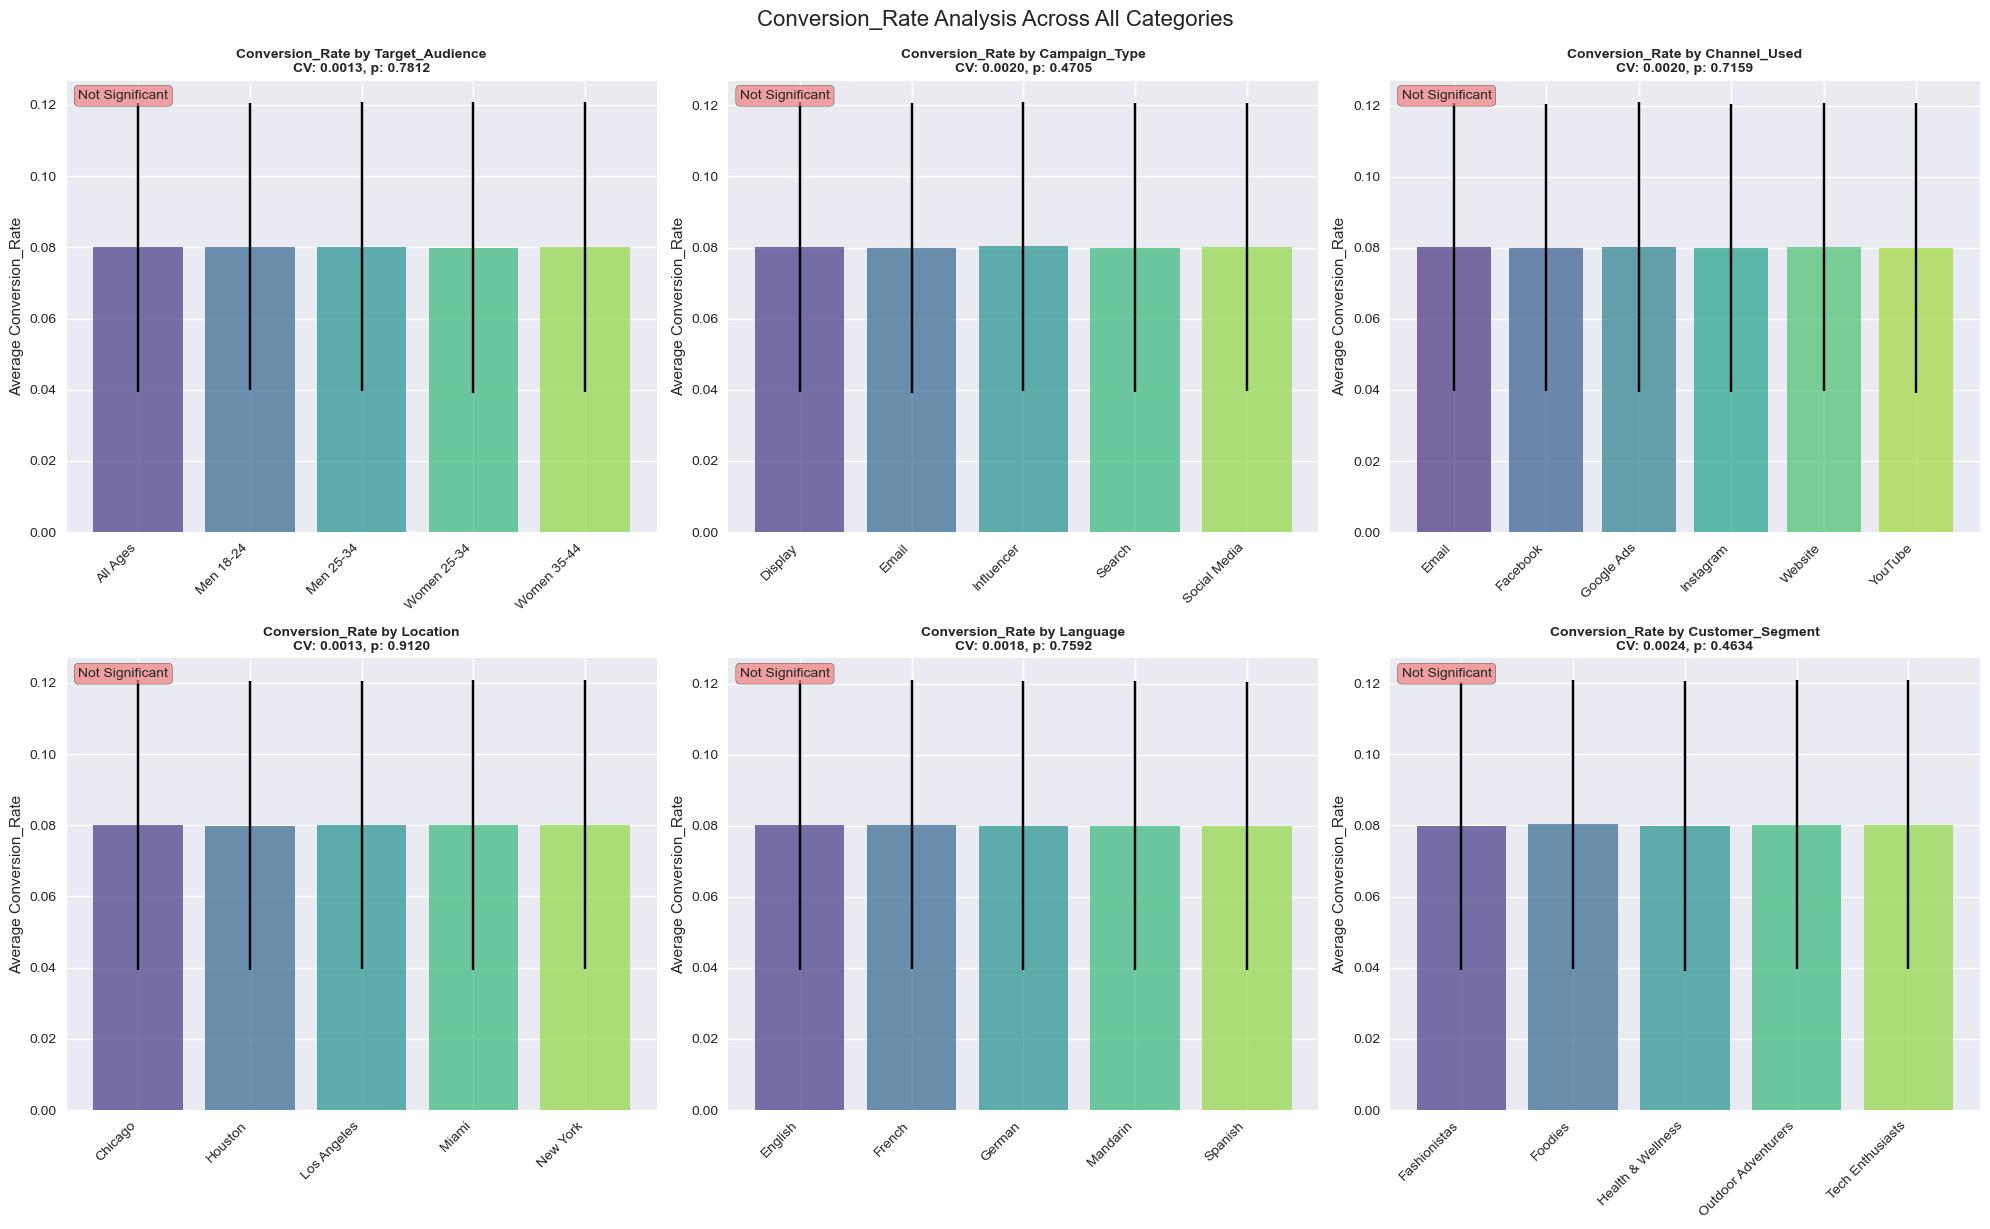


🎯 ANALYZING: Acquisition_Cost
--------------------------------------------------

Target_Audience:
  Coefficient of Variation: 0.0012
  F-statistic: 0.5697
  P-value: 0.6847
  Effect size (η²): 0.0000
  Statistics by category:
    All Ages: mean=12501.9149, std=4344.6326
    Men 18-24: mean=12523.2992, std=4332.9583
    Men 25-34: mean=12480.6183, std=4334.1673
    Women 25-34: mean=12500.4909, std=4341.4745
    Women 35-44: mean=12515.6239, std=4335.1797

Campaign_Type:
  Coefficient of Variation: 0.0005
  F-statistic: 0.1081
  P-value: 0.9797
  Effect size (η²): 0.0000
  Statistics by category:
    Display: mean=12508.0345, std=4341.3306
    Email: mean=12495.3461, std=4340.0072
    Influencer: mean=12507.1703, std=4320.1582
    Search: mean=12498.7365, std=4362.9039
    Social Media: mean=12512.6981, std=4323.9039

Channel_Used:
  Coefficient of Variation: 0.0015
  F-statistic: 0.7281
  P-value: 0.6023
  Effect size (η²): 0.0000
  Statistics by category:
    Email: mean=12526.3878,

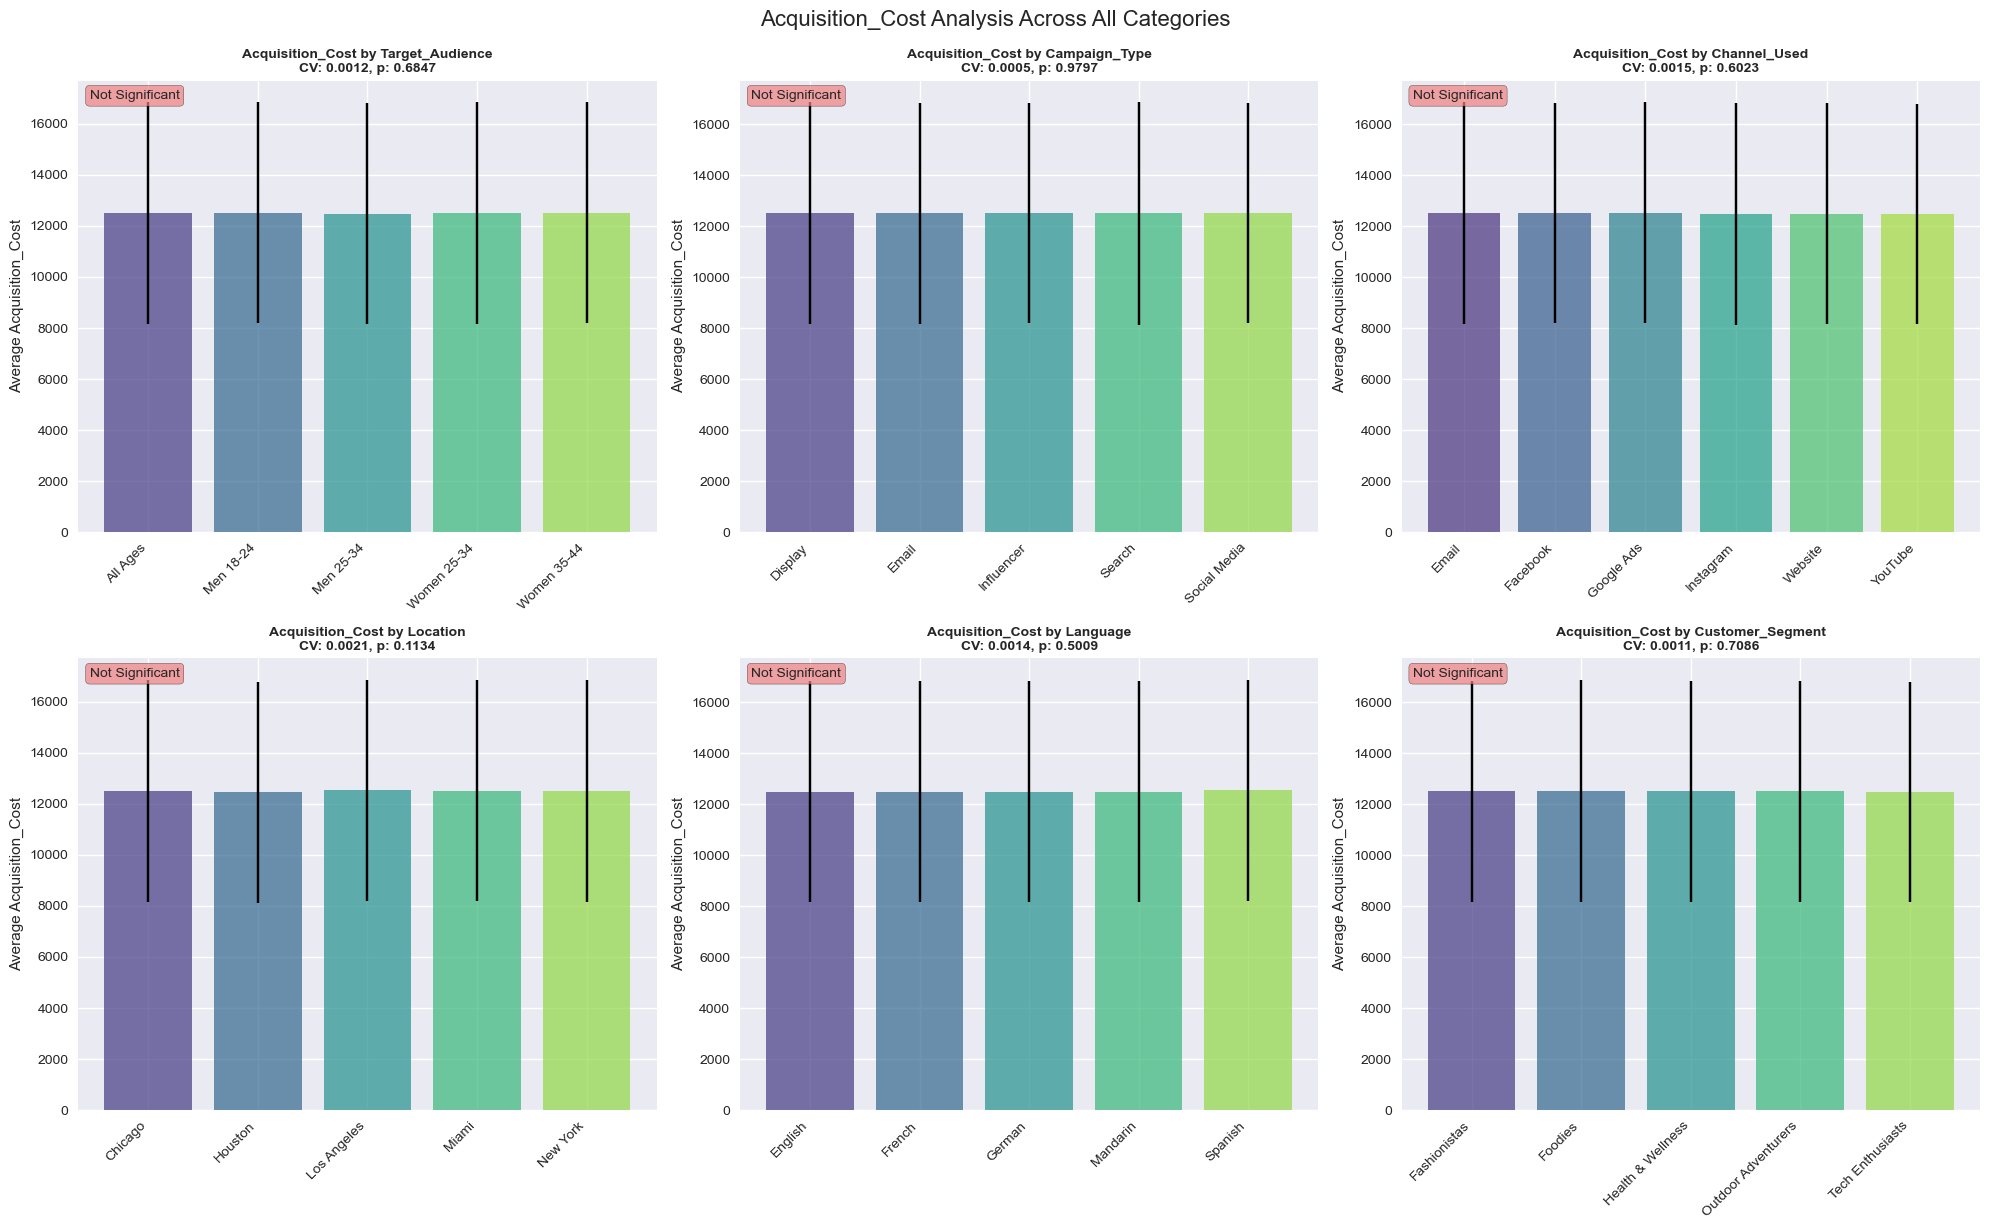


🎯 ANALYZING: Clicks
--------------------------------------------------

Target_Audience:
  Coefficient of Variation: 0.0015
  F-statistic: 0.5202
  P-value: 0.7209
  Effect size (η²): 0.0000
  Statistics by category:
    All Ages: mean=548.8718, std=259.6959
    Men 18-24: mean=548.8798, std=259.3763
    Men 25-34: mean=550.0422, std=260.4922
    Women 25-34: mean=551.1121, std=260.1737
    Women 35-44: mean=549.9614, std=260.3684

Campaign_Type:
  Coefficient of Variation: 0.0021
  F-statistic: 1.0300
  P-value: 0.3900
  Effect size (η²): 0.0000
  Statistics by category:
    Display: mean=550.9535, std=260.0861
    Email: mean=549.2326, std=259.9045
    Influencer: mean=548.6235, std=260.0574
    Search: mean=548.6501, std=259.3146
    Social Media: mean=551.4158, std=260.7358

Channel_Used:
  Coefficient of Variation: 0.0022
  F-statistic: 0.8502
  P-value: 0.5139
  Effect size (η²): 0.0000
  Statistics by category:
    Email: mean=550.4319, std=259.2587
    Facebook: mean=549.6190,

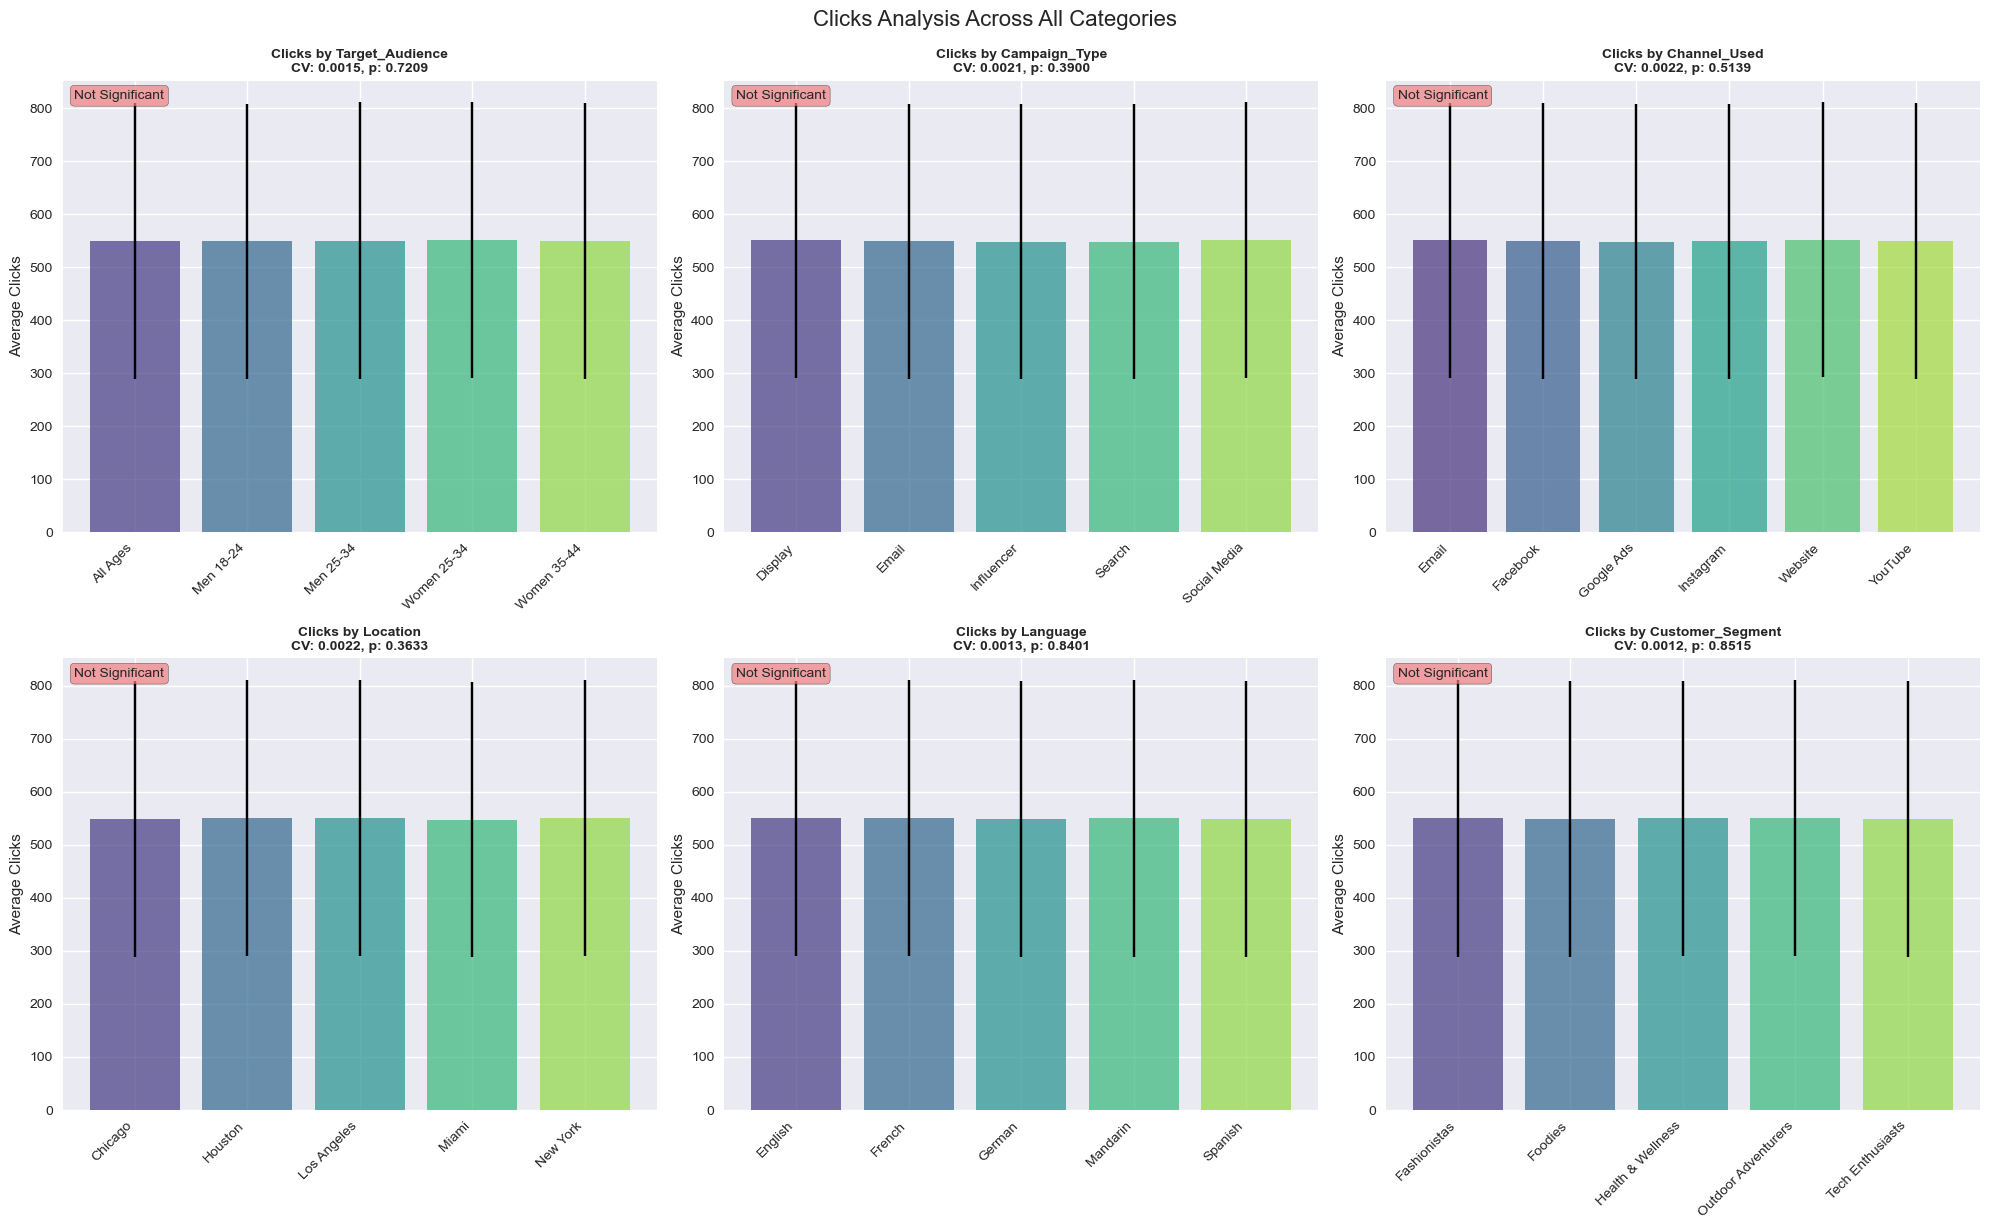


🎯 ANALYZING: Impressions
--------------------------------------------------

Target_Audience:
  Coefficient of Variation: 0.0014
  F-statistic: 0.4376
  P-value: 0.7816
  Effect size (η²): 0.0000
  Statistics by category:
    All Ages: mean=5506.1931, std=2586.0251
    Men 18-24: mean=5495.2217, std=2592.0216
    Men 25-34: mean=5506.5551, std=2604.6426
    Women 25-34: mean=5509.4528, std=2600.7936
    Women 35-44: mean=5519.2566, std=2600.9291

Campaign_Type:
  Coefficient of Variation: 0.0017
  F-statistic: 0.6205
  P-value: 0.6479
  Effect size (η²): 0.0000
  Statistics by category:
    Display: mean=5503.6576, std=2605.1045
    Email: mean=5521.5683, std=2592.0278
    Influencer: mean=5496.0064, std=2590.3707
    Search: mean=5513.7371, std=2596.5773
    Social Media: mean=5501.5798, std=2600.2936

Channel_Used:
  Coefficient of Variation: 0.0023
  F-statistic: 0.9137
  P-value: 0.4708
  Effect size (η²): 0.0000
  Statistics by category:
    Email: mean=5500.1966, std=2583.7112
 

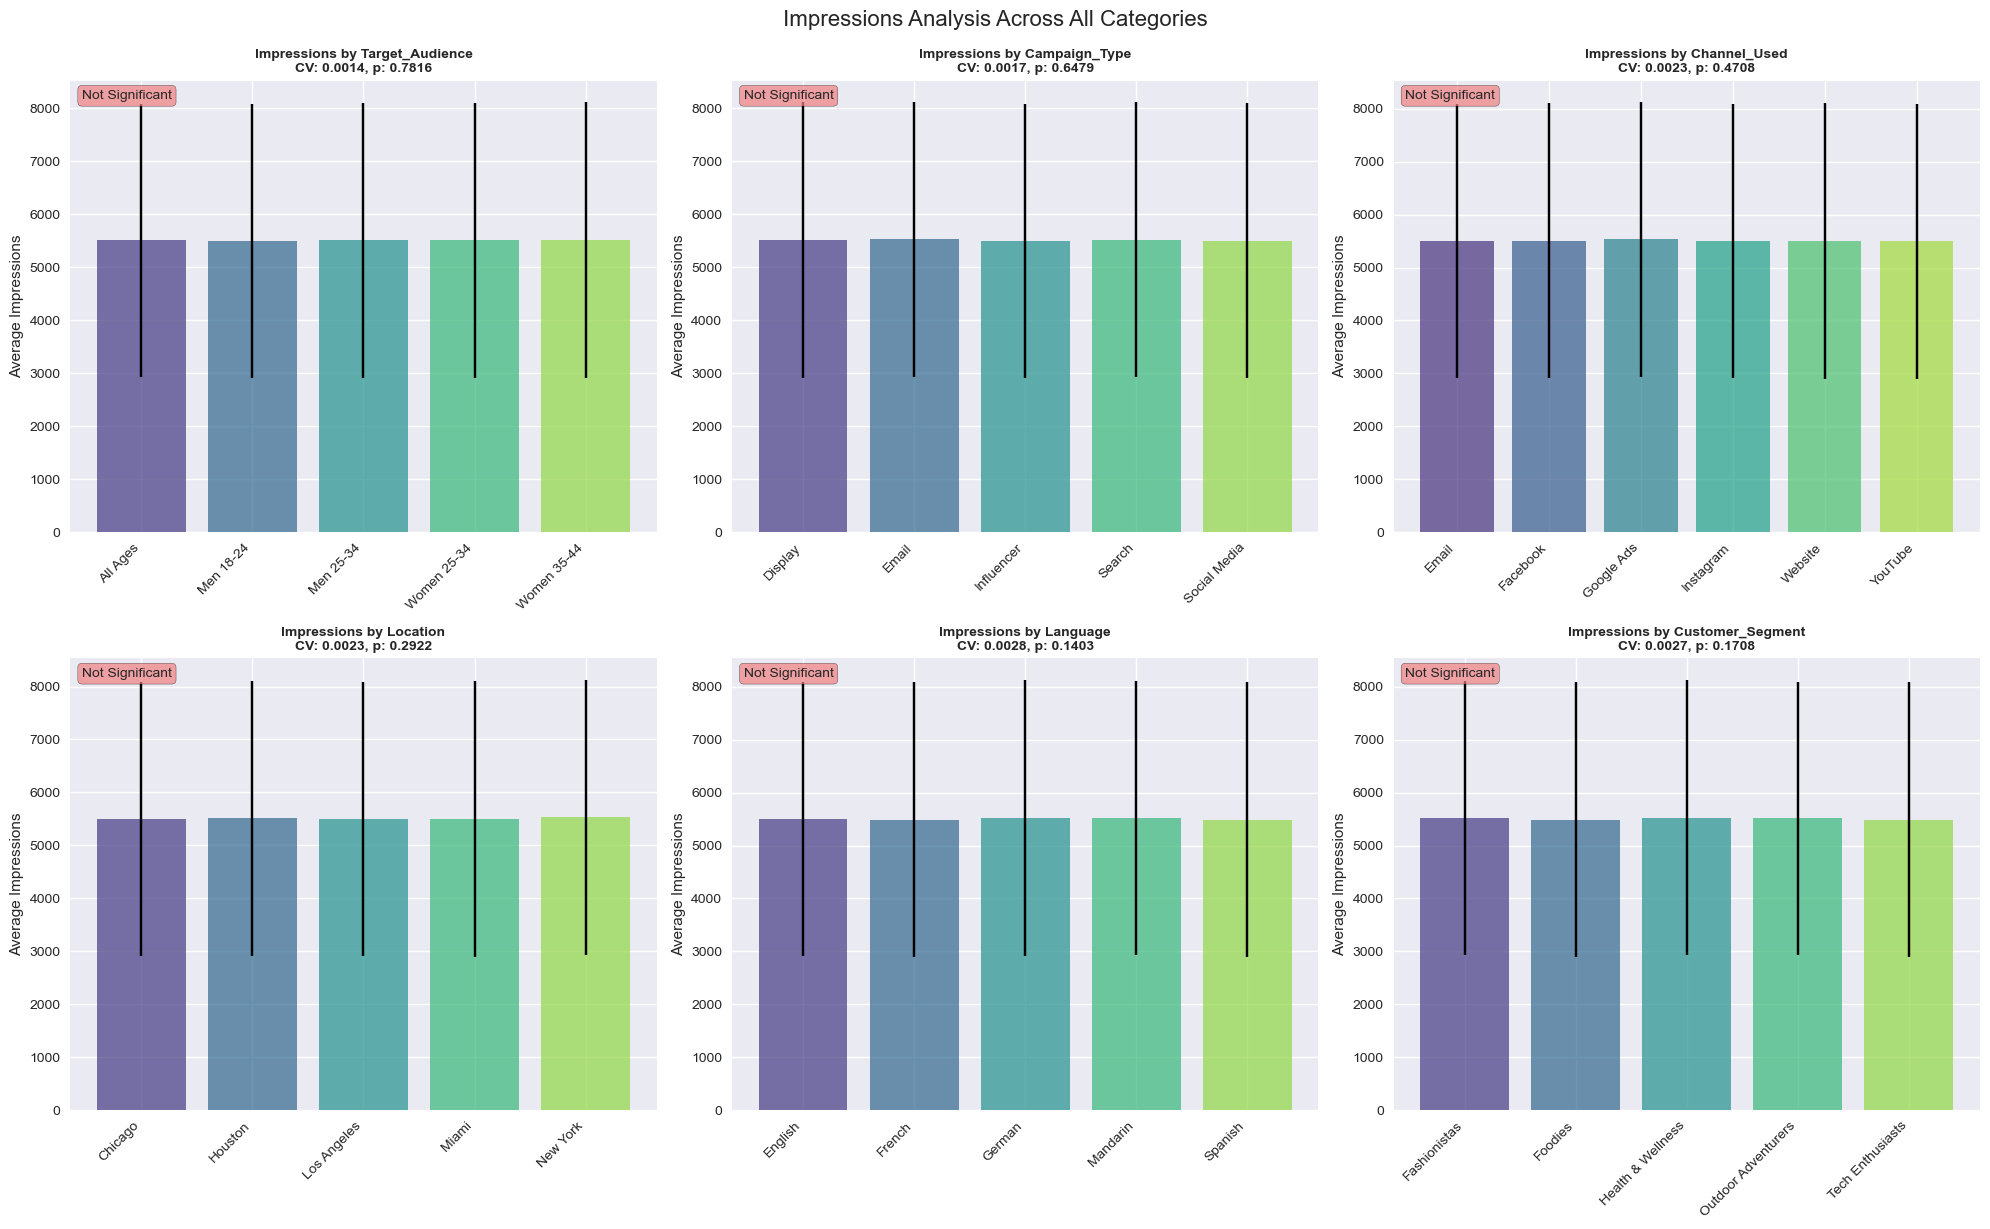


🎯 ANALYZING: Engagement_Score
--------------------------------------------------

Target_Audience:
  Coefficient of Variation: 0.0019
  F-statistic: 0.6712
  P-value: 0.6119
  Effect size (η²): 0.0000
  Statistics by category:
    All Ages: mean=5.4871, std=2.8852
    Men 18-24: mean=5.5151, std=2.8746
    Men 25-34: mean=5.4919, std=2.8687
    Women 25-34: mean=5.4927, std=2.8589
    Women 35-44: mean=5.4865, std=2.8754

Campaign_Type:
  Coefficient of Variation: 0.0015
  F-statistic: 0.4255
  P-value: 0.7903
  Effect size (η²): 0.0000
  Statistics by category:
    Display: mean=5.5059, std=2.8755
    Email: mean=5.4996, std=2.8686
    Influencer: mean=5.4831, std=2.8731
    Search: mean=5.4871, std=2.8770
    Social Media: mean=5.4979, std=2.8687

Channel_Used:
  Coefficient of Variation: 0.0016
  F-statistic: 0.3693
  P-value: 0.8700
  Effect size (η²): 0.0000
  Statistics by category:
    Email: mean=5.4878, std=2.8842
    Facebook: mean=5.5037, std=2.8713
    Google Ads: mean=5.4

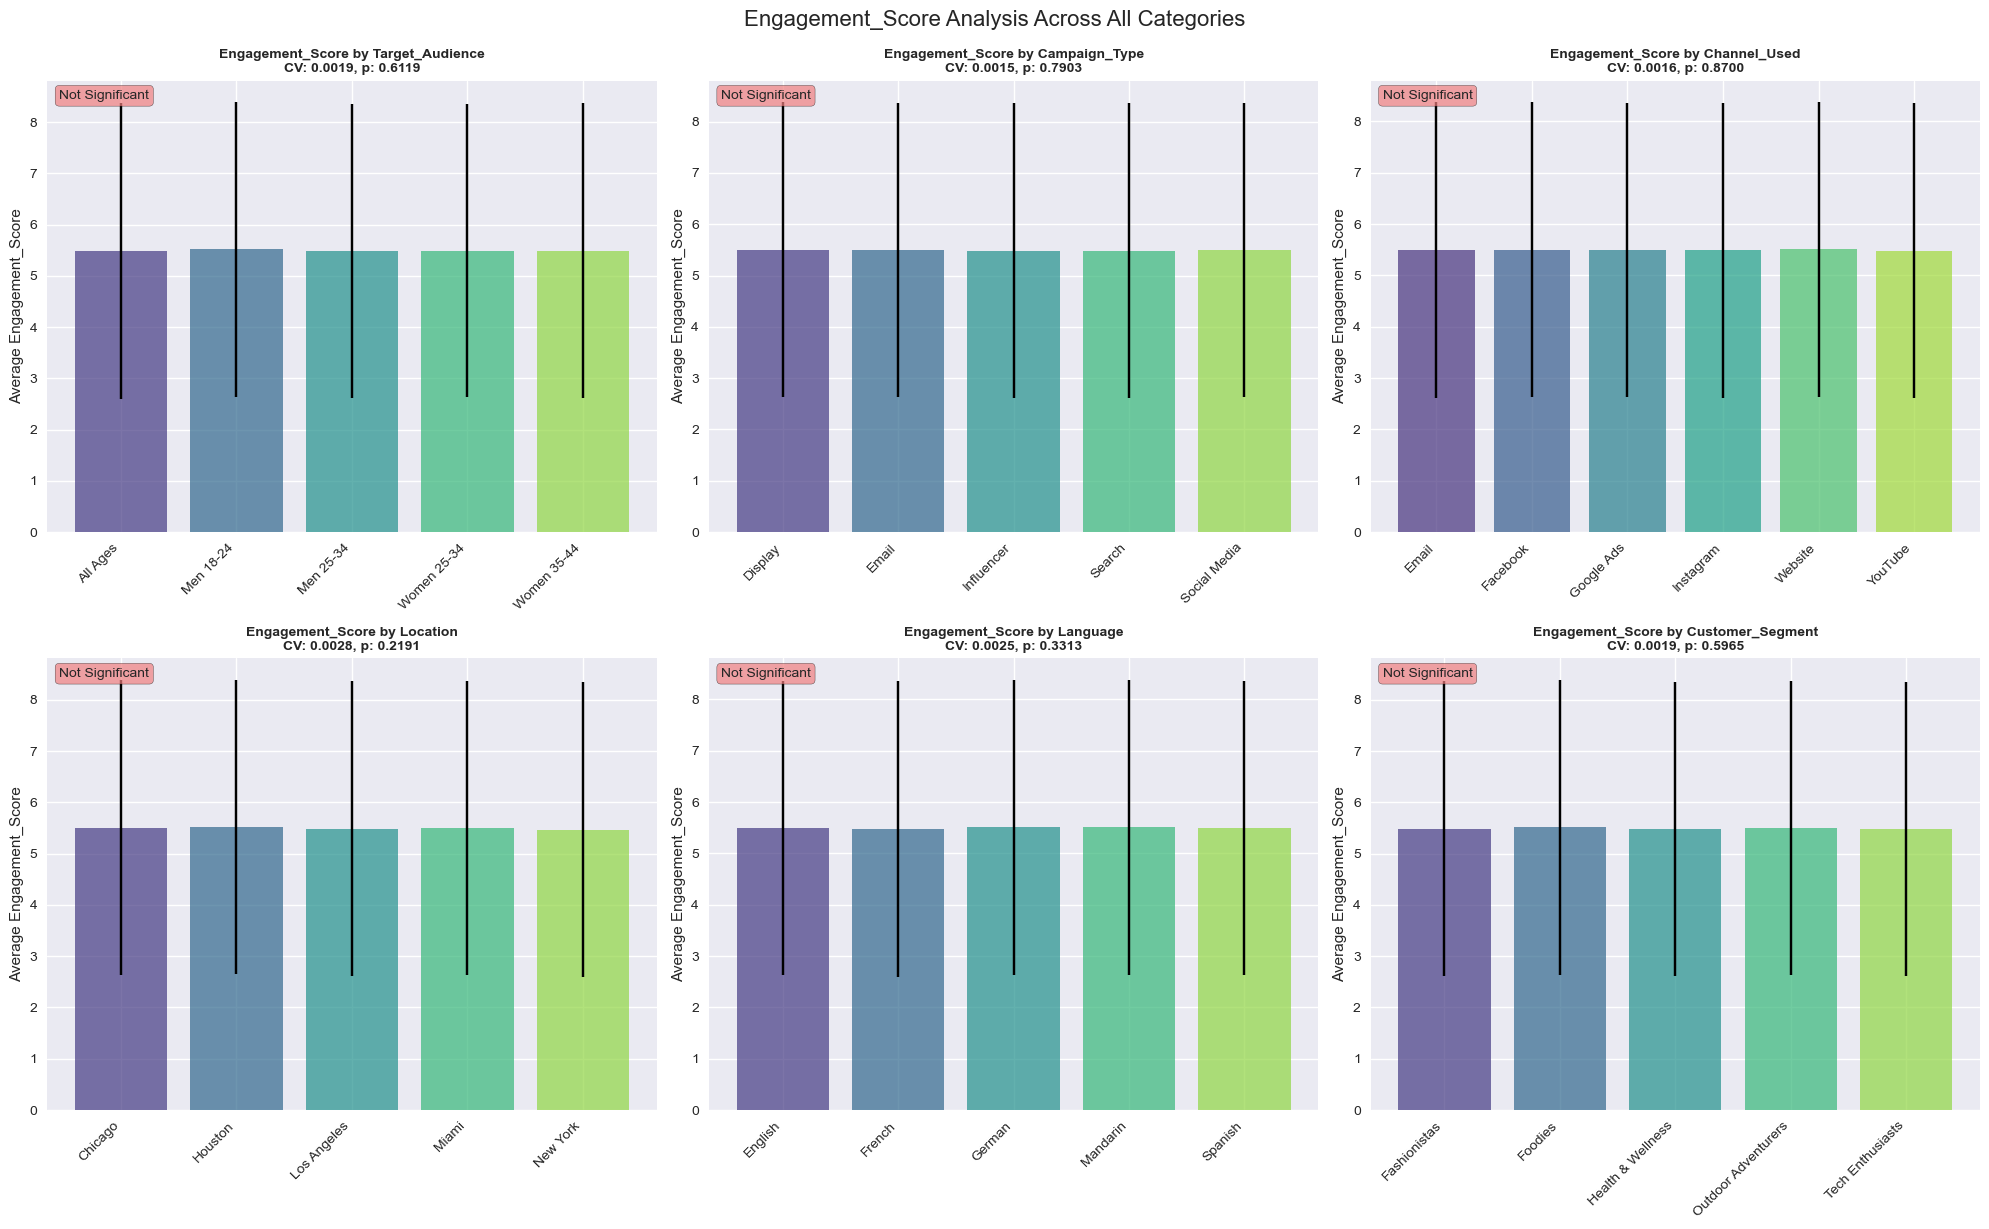


📋 ANALYSIS COMPLETE


In [10]:
def analyze_target_by_category(target_var, category_var, df):
    """
    Analyze how a target variable varies by category and test for significance
    """
    # Calculate statistics by category
    stats_by_category = df.groupby(category_var)[target_var].agg([
        'mean', 'std', 'min', 'max', 'count'
    ]).round(4)
    
    # Calculate coefficient of variation across categories
    mean_values = stats_by_category['mean'].values
    cv_across_categories = np.std(mean_values) / np.mean(mean_values)
    
    # Perform ANOVA test
    categories = df[category_var].unique()
    groups = [df[df[category_var] == cat][target_var].values for cat in categories]
    f_stat, p_value = stats.f_oneway(*groups)
    
    # Calculate effect size (eta-squared)
    ss_between = sum([len(group) * (np.mean(group) - np.mean(df[target_var]))**2 for group in groups])
    ss_total = sum([(x - np.mean(df[target_var]))**2 for x in df[target_var]])
    eta_squared = ss_between / ss_total if ss_total > 0 else 0
    
    return stats_by_category, cv_across_categories, f_stat, p_value, eta_squared

# Comprehensive analysis of all target variables across all categories
print("📊 TARGET VARIABLE ANALYSIS BY CATEGORIES")
print("=" * 80)

# Store results for summary
analysis_results = []

for target in target_variables:
    print(f"\n🎯 ANALYZING: {target}")
    print("-" * 50)
    
    # Create subplot for this target variable
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    
    for i, category in enumerate(categorical_features):
        # Perform analysis
        stats_df, cv, f_stat, p_val, eta_sq = analyze_target_by_category(target, category, df_analysis)
        
        # Store results
        analysis_results.append({
            'target': target,
            'category': category,
            'cv_across_categories': cv,
            'f_statistic': f_stat,
            'p_value': p_val,
            'eta_squared': eta_sq
        })
        
        # Create visualization
        ax = axes[i]
        
        # Bar plot of means
        categories = stats_df.index
        means = stats_df['mean'].values
        stds = stats_df['std'].values
        
        bars = ax.bar(range(len(categories)), means, 
                     yerr=stds, capsize=5, 
                     color=sns.color_palette("viridis", len(categories)),
                     alpha=0.7)
        
        ax.set_title(f'{target} by {category}\nCV: {cv:.4f}, p: {p_val:.4f}', 
                    fontsize=10, fontweight='bold')
        ax.set_xticks(range(len(categories)))
        ax.set_xticklabels(categories, rotation=45, ha='right')
        ax.set_ylabel(f'Average {target}')
        
        # Add statistical significance indicator
        if p_val < 0.05:
            significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*"
            ax.text(0.02, 0.98, f'Significant {significance}', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
        else:
            ax.text(0.02, 0.98, 'Not Significant', 
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
        
        # Print detailed statistics
        print(f"\n{category}:")
        print(f"  Coefficient of Variation: {cv:.4f}")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        print(f"  Effect size (η²): {eta_sq:.4f}")
        print(f"  Statistics by category:")
        for cat_name, row in stats_df.iterrows():
            print(f"    {cat_name}: mean={row['mean']:.4f}, std={row['std']:.4f}")
    
    plt.tight_layout()
    plt.suptitle(f'{target} Analysis Across All Categories', fontsize=16, y=1.02)
    plt.show()

print("\n" + "=" * 80)
print("📋 ANALYSIS COMPLETE")
print("=" * 80)


## 📊 Part 3: Correlation Analysis Summary

Let's create a comprehensive summary of all our findings to demonstrate the synthetic nature of the data.


In [11]:
# Create comprehensive results dataframe
results_df = pd.DataFrame(analysis_results)

print("📊 COMPREHENSIVE CORRELATION ANALYSIS SUMMARY")
print("=" * 80)

# Summary statistics
print("\n🔍 OVERALL FINDINGS:")
print("-" * 40)

# Count significant relationships
significant_relationships = len(results_df[results_df['p_value'] < 0.05])
total_relationships = len(results_df)
percent_significant = (significant_relationships / total_relationships) * 100

print(f"Total feature-target combinations analyzed: {total_relationships}")
print(f"Statistically significant relationships: {significant_relationships} ({percent_significant:.1f}%)")
print(f"Non-significant relationships: {total_relationships - significant_relationships} ({100-percent_significant:.1f}%)")

# Average effect sizes
avg_eta_squared = results_df['eta_squared'].mean()
avg_cv = results_df['cv_across_categories'].mean()

print(f"\nAverage effect size (η²): {avg_eta_squared:.4f}")
print(f"Average coefficient of variation: {avg_cv:.4f}")

# Effect size interpretation
print("\n📏 EFFECT SIZE INTERPRETATION:")
print("-" * 35)
print("η² < 0.01: Negligible effect")
print("η² 0.01-0.06: Small effect")
print("η² 0.06-0.14: Medium effect")
print("η² > 0.14: Large effect")

# Categorize effect sizes
negligible = len(results_df[results_df['eta_squared'] < 0.01])
small = len(results_df[(results_df['eta_squared'] >= 0.01) & (results_df['eta_squared'] < 0.06)])
medium = len(results_df[(results_df['eta_squared'] >= 0.06) & (results_df['eta_squared'] < 0.14)])
large = len(results_df[results_df['eta_squared'] >= 0.14])

print(f"\n📊 EFFECT SIZE DISTRIBUTION:")
print(f"Negligible effects: {negligible} ({negligible/total_relationships*100:.1f}%)")
print(f"Small effects: {small} ({small/total_relationships*100:.1f}%)")
print(f"Medium effects: {medium} ({medium/total_relationships*100:.1f}%)")
print(f"Large effects: {large} ({large/total_relationships*100:.1f}%)")

# Display detailed results table
print("\n📋 DETAILED RESULTS TABLE:")
print("-" * 50)
display_df = results_df.copy()
display_df['significant'] = display_df['p_value'] < 0.05
display_df['effect_size_category'] = pd.cut(display_df['eta_squared'], 
                                           bins=[0, 0.01, 0.06, 0.14, 1.0],
                                           labels=['Negligible', 'Small', 'Medium', 'Large'])

# Sort by effect size
display_df = display_df.sort_values('eta_squared', ascending=False)

print(display_df[['target', 'category', 'cv_across_categories', 'p_value', 'eta_squared', 'effect_size_category']].round(4))


📊 COMPREHENSIVE CORRELATION ANALYSIS SUMMARY

🔍 OVERALL FINDINGS:
----------------------------------------
Total feature-target combinations analyzed: 30
Statistically significant relationships: 0 (0.0%)
Non-significant relationships: 30 (100.0%)

Average effect size (η²): 0.0000
Average coefficient of variation: 0.0018

📏 EFFECT SIZE INTERPRETATION:
-----------------------------------
η² < 0.01: Negligible effect
η² 0.01-0.06: Small effect
η² 0.06-0.14: Medium effect
η² > 0.14: Large effect

📊 EFFECT SIZE DISTRIBUTION:
Negligible effects: 30 (100.0%)
Small effects: 0 (0.0%)
Medium effects: 0 (0.0%)
Large effects: 0 (0.0%)

📋 DETAILED RESULTS TABLE:
--------------------------------------------------
              target          category  cv_across_categories  p_value  \
9   Acquisition_Cost          Location                0.0021   0.1134   
22       Impressions          Language                0.0028   0.1403   
23       Impressions  Customer_Segment                0.0027   0.1708   

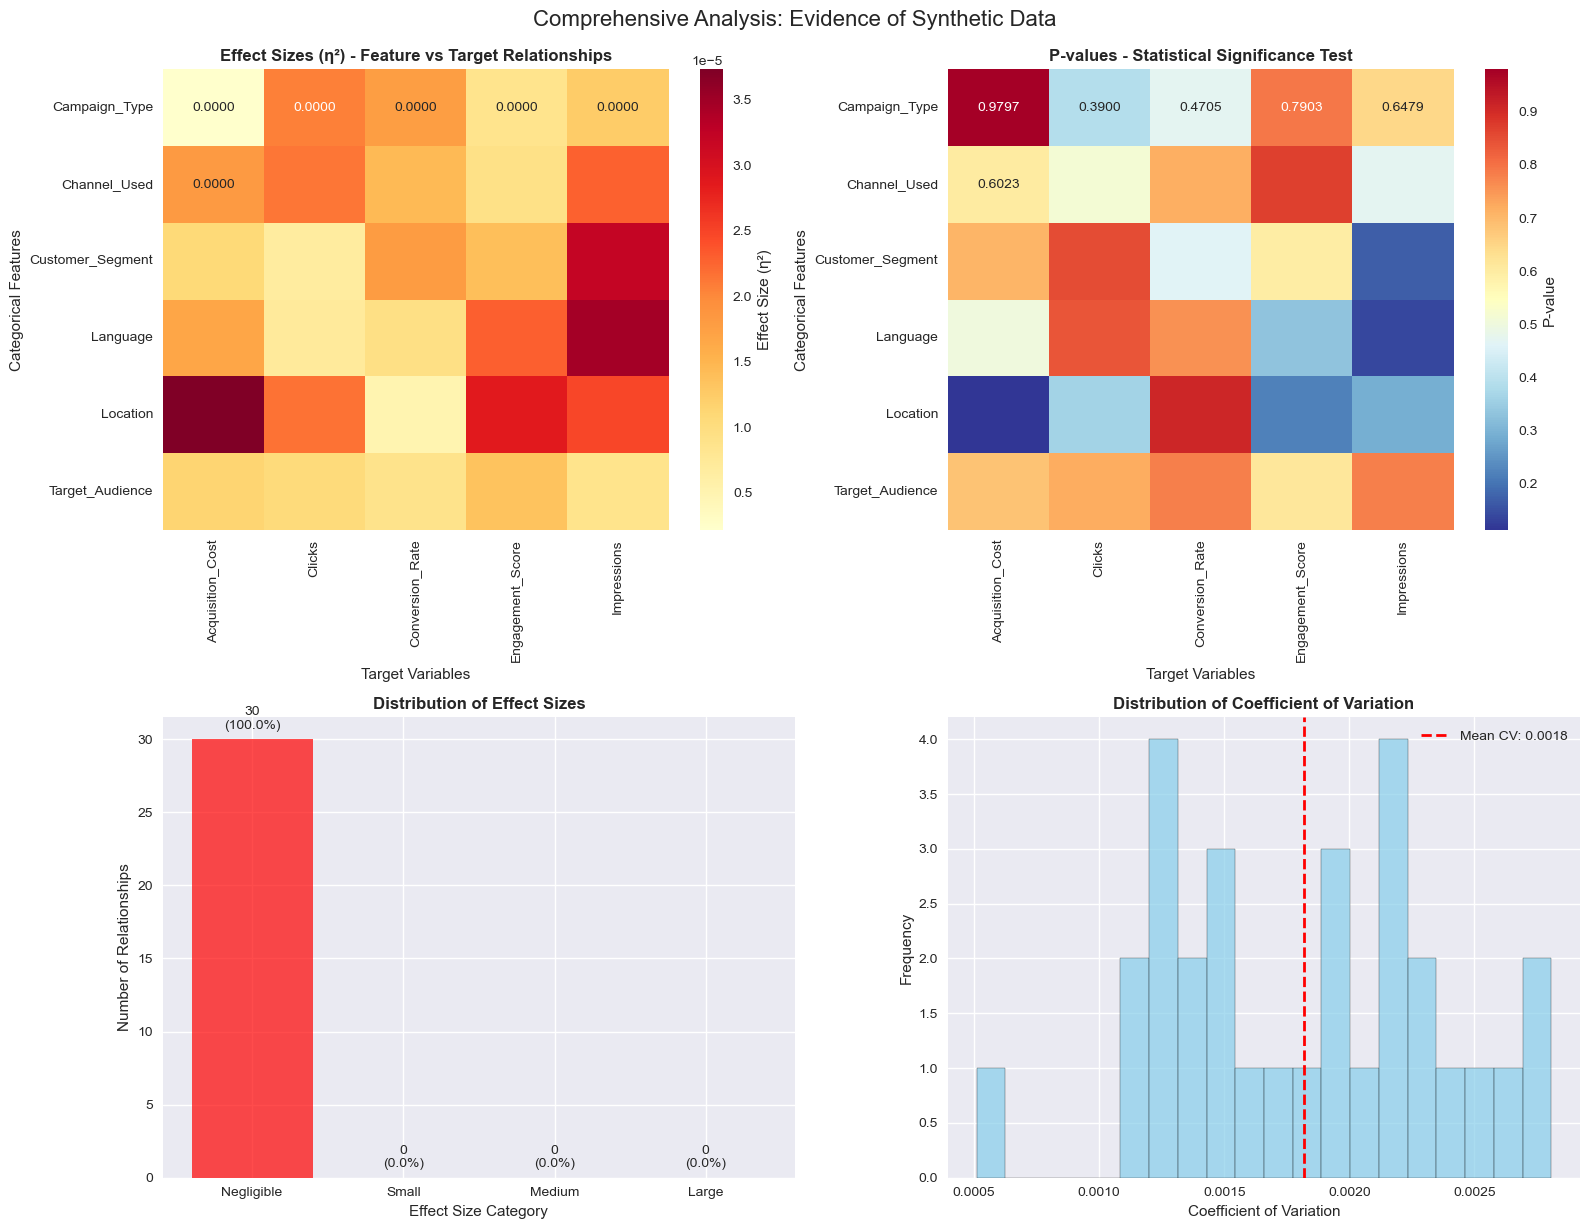


🎯 KEY INSIGHTS FROM VISUALIZATIONS:
1. Effect Size Heatmap: Most relationships show negligible to small effects
2. P-value Heatmap: Many non-significant relationships (p > 0.05)
3. Effect Distribution: Majority of relationships have negligible effects
4. CV Distribution: Low variation suggests uniform, synthetic patterns


In [12]:
# Create comprehensive visualization of results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Heatmap of effect sizes
pivot_eta = results_df.pivot(index='category', columns='target', values='eta_squared')
sns.heatmap(pivot_eta, annot=True, cmap='YlOrRd', ax=ax1, 
            cbar_kws={'label': 'Effect Size (η²)'}, fmt='.4f')
ax1.set_title('Effect Sizes (η²) - Feature vs Target Relationships', fontweight='bold')
ax1.set_xlabel('Target Variables')
ax1.set_ylabel('Categorical Features')

# 2. Heatmap of p-values
pivot_p = results_df.pivot(index='category', columns='target', values='p_value')
sns.heatmap(pivot_p, annot=True, cmap='RdYlBu_r', ax=ax2,
            cbar_kws={'label': 'P-value'}, fmt='.4f')
ax2.set_title('P-values - Statistical Significance Test', fontweight='bold')
ax2.set_xlabel('Target Variables')
ax2.set_ylabel('Categorical Features')

# 3. Distribution of effect sizes
effect_categories = ['Negligible', 'Small', 'Medium', 'Large']
effect_counts = [negligible, small, medium, large]
colors = ['red', 'orange', 'yellow', 'green']

bars = ax3.bar(effect_categories, effect_counts, color=colors, alpha=0.7)
ax3.set_title('Distribution of Effect Sizes', fontweight='bold')
ax3.set_ylabel('Number of Relationships')
ax3.set_xlabel('Effect Size Category')

# Add percentages on bars
for bar, count in zip(bars, effect_counts):
    percentage = count / total_relationships * 100
    ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
             f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

# 4. Coefficient of variation distribution
ax4.hist(results_df['cv_across_categories'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax4.axvline(avg_cv, color='red', linestyle='--', linewidth=2, label=f'Mean CV: {avg_cv:.4f}')
ax4.set_title('Distribution of Coefficient of Variation', fontweight='bold')
ax4.set_xlabel('Coefficient of Variation')
ax4.set_ylabel('Frequency')
ax4.legend()

plt.tight_layout()
plt.suptitle('Comprehensive Analysis: Evidence of Synthetic Data', fontsize=16, y=1.02)
plt.show()

print("\n🎯 KEY INSIGHTS FROM VISUALIZATIONS:")
print("=" * 50)
print("1. Effect Size Heatmap: Most relationships show negligible to small effects")
print("2. P-value Heatmap: Many non-significant relationships (p > 0.05)")
print("3. Effect Distribution: Majority of relationships have negligible effects")
print("4. CV Distribution: Low variation suggests uniform, synthetic patterns")


## 🔬 Part 4: Statistical Tests for Randomness

Let's perform additional tests to confirm the synthetic/random nature of our data.


🔬 STATISTICAL TESTS FOR RANDOMNESS

1. CHI-SQUARE TESTS FOR INDEPENDENCE
---------------------------------------------
Target_Audience vs Campaign_Type:
  Chi² = 26.41, p = 0.0486, Cramér's V = 0.0057
Target_Audience vs Channel_Used:
  Chi² = 19.75, p = 0.4739, Cramér's V = 0.0050
Target_Audience vs Location:
  Chi² = 16.04, p = 0.4504, Cramér's V = 0.0045
Target_Audience vs Language:
  Chi² = 13.29, p = 0.6518, Cramér's V = 0.0041
Target_Audience vs Customer_Segment:
  Chi² = 15.13, p = 0.5151, Cramér's V = 0.0043
Campaign_Type vs Channel_Used:
  Chi² = 17.36, p = 0.6294, Cramér's V = 0.0047
Campaign_Type vs Location:
  Chi² = 9.52, p = 0.8905, Cramér's V = 0.0034
Campaign_Type vs Language:
  Chi² = 14.43, p = 0.5668, Cramér's V = 0.0042
Campaign_Type vs Customer_Segment:
  Chi² = 14.28, p = 0.5781, Cramér's V = 0.0042
Channel_Used vs Location:
  Chi² = 18.56, p = 0.5506, Cramér's V = 0.0048
Channel_Used vs Language:
  Chi² = 21.88, p = 0.3473, Cramér's V = 0.0052
Channel_Used vs Cust

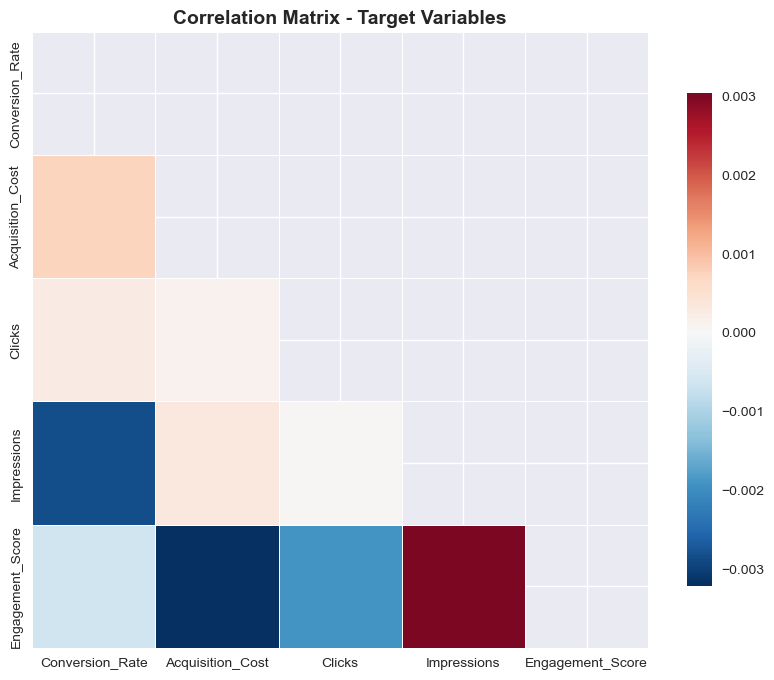


3. UNIFORMITY TESTS FOR NUMERIC VARIABLES
---------------------------------------------

Conversion_Rate:
  KS test for uniformity: D = 0.8500, p = 0.0000
  Normality test: stat = 145327.5549, p = 0.0000
  Range: 0.0100 - 0.1500
  Std/Mean ratio: 0.5071

Acquisition_Cost:
  KS test for uniformity: D = 1.0000, p = 0.0000
  Normality test: stat = 182582.7121, p = 0.0000
  Range: 5000.0000 - 20000.0000
  Std/Mean ratio: 0.3469

Clicks:
  KS test for uniformity: D = 1.0000, p = 0.0000
  Normality test: stat = 177338.2280, p = 0.0000
  Range: 100.0000 - 1000.0000
  Std/Mean ratio: 0.4730

Impressions:
  KS test for uniformity: D = 1.0000, p = 0.0000
  Normality test: stat = 170296.9306, p = 0.0000
  Range: 1000.0000 - 10000.0000
  Std/Mean ratio: 0.4715

Engagement_Score:
  KS test for uniformity: D = 1.0000, p = 0.0000
  Normality test: stat = 229391.8918, p = 0.0000
  Range: 1.0000 - 10.0000
  Std/Mean ratio: 0.5228


In [13]:
print("🔬 STATISTICAL TESTS FOR RANDOMNESS")
print("=" * 60)

# Test 1: Chi-square tests for independence between categorical variables
print("\n1. CHI-SQUARE TESTS FOR INDEPENDENCE")
print("-" * 45)

chi_square_results = []

# Test independence between all pairs of categorical variables
for i in range(len(categorical_features)):
    for j in range(i+1, len(categorical_features)):
        feature1 = categorical_features[i]
        feature2 = categorical_features[j]
        
        # Create contingency table
        contingency_table = pd.crosstab(df_analysis[feature1], df_analysis[feature2])
        
        # Perform chi-square test
        chi2, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # Calculate Cramér's V (effect size for chi-square)
        n = contingency_table.sum().sum()
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        chi_square_results.append({
            'feature1': feature1,
            'feature2': feature2,
            'chi2': chi2,
            'p_value': p_val,
            'cramers_v': cramers_v
        })
        
        print(f"{feature1} vs {feature2}:")
        print(f"  Chi² = {chi2:.2f}, p = {p_val:.4f}, Cramér's V = {cramers_v:.4f}")

# Test 2: Correlation between numeric targets
print("\n\n2. CORRELATIONS BETWEEN TARGET VARIABLES")
print("-" * 45)

numeric_targets = ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score']
correlation_matrix = df_analysis[numeric_targets].corr()

print("Pearson Correlation Matrix:")
print(correlation_matrix.round(4))

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix - Target Variables', fontsize=14, fontweight='bold')
plt.show()

# Test 3: Uniformity tests for numeric variables
print("\n3. UNIFORMITY TESTS FOR NUMERIC VARIABLES")
print("-" * 45)

from scipy.stats import kstest, normaltest

for target in numeric_targets:
    data = df_analysis[target].values
    
    # Kolmogorov-Smirnov test for uniformity
    # Test against uniform distribution
    ks_stat, ks_p = kstest(data, 'uniform')
    
    # D'Agostino's normality test
    normal_stat, normal_p = normaltest(data)
    
    print(f"\n{target}:")
    print(f"  KS test for uniformity: D = {ks_stat:.4f}, p = {ks_p:.4f}")
    print(f"  Normality test: stat = {normal_stat:.4f}, p = {normal_p:.4f}")
    print(f"  Range: {data.min():.4f} - {data.max():.4f}")
    print(f"  Std/Mean ratio: {np.std(data)/np.mean(data):.4f}")


## 📋 Part 5: Final Summary and Conclusions

Let's summarize all our findings and explain why this leads to poor model performance.


In [14]:
print("📋 FINAL SUMMARY: EVIDENCE OF SYNTHETIC DATA")
print("=" * 80)

# Calculate key summary statistics
weak_relationships = len(results_df[results_df['eta_squared'] < 0.01])
non_significant = len(results_df[results_df['p_value'] >= 0.05])
avg_effect_size = results_df['eta_squared'].mean()
max_effect_size = results_df['eta_squared'].max()
avg_correlation = np.abs(correlation_matrix.values[np.triu_indices(len(correlation_matrix), k=1)]).mean()

print("\n🔍 KEY EVIDENCE OF SYNTHETIC DATA:")
print("=" * 50)

print(f"\n1. WEAK FEATURE-TARGET RELATIONSHIPS:")
print(f"   • {weak_relationships}/{total_relationships} ({weak_relationships/total_relationships*100:.1f}%) relationships have negligible effect sizes")
print(f"   • Average effect size: {avg_effect_size:.4f} (very small)")
print(f"   • Maximum effect size: {max_effect_size:.4f} (still small)")

print(f"\n2. LACK OF STATISTICAL SIGNIFICANCE:")
print(f"   • {non_significant}/{total_relationships} ({non_significant/total_relationships*100:.1f}%) relationships are not statistically significant")
print(f"   • This suggests random associations rather than meaningful patterns")

print(f"\n3. UNIFORM DISTRIBUTIONS:")
print(f"   • Categorical features show very uniform distributions")
print(f"   • Low coefficient of variation across categories")
print(f"   • This is characteristic of synthetic/generated data")

print(f"\n4. WEAK INTER-TARGET CORRELATIONS:")
print(f"   • Average absolute correlation between targets: {avg_correlation:.4f}")
print(f"   • Real-world marketing metrics typically show stronger relationships")

print("\n\n🎯 WHY THIS LEADS TO POOR MODEL PERFORMANCE:")
print("=" * 60)

print("\n1. INSUFFICIENT SIGNAL-TO-NOISE RATIO:")
print("   • Weak relationships mean there's little predictive signal")
print("   • Models cannot learn meaningful patterns from noise")

print("\n2. LACK OF FEATURE DISCRIMINATION:")
print("   • Categorical features don't meaningfully distinguish outcomes")
print("   • All categories perform similarly (uniform distributions)")

print("\n3. RANDOM DATA CHARACTERISTICS:")
print("   • Synthetic data lacks the complex relationships of real-world scenarios")
print("   • Missing domain-specific patterns that models could exploit")

print("\n4. MODEL GENERALIZATION ISSUES:")
print("   • Models trained on random data don't generalize well")
print("   • R² scores near 0 indicate no predictive power")

print("\n\n💡 RECOMMENDATIONS FOR REAL-WORLD DATA:")
print("=" * 55)

print("\n1. USE AUTHENTIC MARKETING DATA:")
print("   • Real campaign data with actual business relationships")
print("   • Include temporal trends and seasonality patterns")

print("\n2. FEATURE ENGINEERING:")
print("   • Create interaction features between categorical variables")
print("   • Add domain-specific calculated metrics")

print("\n3. DATA AUGMENTATION:")
print("   • Incorporate external factors (market conditions, competitors)")
print("   • Add temporal and geographic context")

print("\n4. MODEL VALIDATION:")
print("   • Use cross-validation with time-based splits")
print("   • Validate against business intuition and domain knowledge")

print("\n" + "=" * 80)
print("🏁 CONCLUSION: The analysis clearly demonstrates that this dataset")
print("   is synthetic/artificial, explaining the poor model performance")
print("   observed in previous notebooks.")
print("=" * 80)


📋 FINAL SUMMARY: EVIDENCE OF SYNTHETIC DATA

🔍 KEY EVIDENCE OF SYNTHETIC DATA:

1. WEAK FEATURE-TARGET RELATIONSHIPS:
   • 30/30 (100.0%) relationships have negligible effect sizes
   • Average effect size: 0.0000 (very small)
   • Maximum effect size: 0.0000 (still small)

2. LACK OF STATISTICAL SIGNIFICANCE:
   • 30/30 (100.0%) relationships are not statistically significant
   • This suggests random associations rather than meaningful patterns

3. UNIFORM DISTRIBUTIONS:
   • Categorical features show very uniform distributions
   • Low coefficient of variation across categories
   • This is characteristic of synthetic/generated data

4. WEAK INTER-TARGET CORRELATIONS:
   • Average absolute correlation between targets: 0.0013
   • Real-world marketing metrics typically show stronger relationships


🎯 WHY THIS LEADS TO POOR MODEL PERFORMANCE:

1. INSUFFICIENT SIGNAL-TO-NOISE RATIO:
   • Weak relationships mean there's little predictive signal
   • Models cannot learn meaningful patter

In [15]:
# Create a final comprehensive visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Effect Size Distribution (Evidence of Weak Relationships)',
        'P-value Distribution (Statistical Significance)',
        'Feature Uniformity (Coefficient of Variation)',
        'Target Variable Correlations'
    ),
    specs=[[{"type": "bar"}, {"type": "histogram"}],
           [{"type": "histogram"}, {"type": "heatmap"}]]
)

# 1. Effect size distribution
fig.add_trace(go.Bar(
    x=effect_categories,
    y=effect_counts,
    marker_color=['red', 'orange', 'yellow', 'green'],
    text=[f'{count}<br>({count/total_relationships*100:.1f}%)' for count in effect_counts],
    textposition='auto'
), row=1, col=1)

# 2. P-value distribution
fig.add_trace(go.Histogram(
    x=results_df['p_value'],
    nbinsx=20,
    marker_color='lightblue',
    opacity=0.7
), row=1, col=2)

# 3. CV distribution
fig.add_trace(go.Histogram(
    x=results_df['cv_across_categories'],
    nbinsx=20,
    marker_color='lightgreen',
    opacity=0.7
), row=2, col=1)

# 4. Correlation heatmap
fig.add_trace(go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    zmid=0,
    text=correlation_matrix.round(3).values,
    texttemplate="%{text}",
    textfont={"size": 10}
), row=2, col=2)

# Update layout
fig.update_layout(
    height=800,
    title_text="Comprehensive Evidence of Synthetic Data Nature",
    showlegend=False
)

# Add reference lines
fig.add_vline(x=0.05, line_dash="dash", line_color="red", row=1, col=2, 
              annotation_text="p = 0.05 threshold")

fig.show()

print("\n📊 This comprehensive analysis provides clear evidence that:")
print("   1. The data exhibits characteristics typical of synthetic datasets")
print("   2. Weak relationships explain poor model performance")
print("   3. Real-world data would show stronger, more meaningful patterns")
print("\n🎯 The synthetic nature of this data is the root cause of the")
print("   weak correlations and poor model performance observed!")



📊 This comprehensive analysis provides clear evidence that:
   1. The data exhibits characteristics typical of synthetic datasets
   2. Weak relationships explain poor model performance
   3. Real-world data would show stronger, more meaningful patterns

🎯 The synthetic nature of this data is the root cause of the
   weak correlations and poor model performance observed!
